## Project Title:
An analysis of the Indian start-up ecosystem

## Business Understanding


1. Objectives

The main objective of this analysis is to understand the Indian start-up ecosystem, identify the key trends in funding, and explore the factors that influence a start-up's ability to receive funding. The ultimate goal is to use this knowledge to venture into the Indian start-up ecosystem.

2. Situation Assessment

The Indian start-up ecosystem has been growing rapidly over the last few years with increasing numbers of start-ups entering the market and attracting investment. However, the competition for funding is intense, and it can be challenging for new start-ups to secure the funding they need to grow and succeed. This analysis aims to explore the funding landscape in more detail, including the types of funding available, the sectors and industries that are receiving the most funding, among others.

3. Success criteria (Data Mining Goals)

The success of this analysis will be measured by the insights and recommendations it generates to enhance our chances of securing funding. We will evaluate the success of our analysis based on the number of investors we are able to secure, the amount of funding we are able to receive, and our ability to use the insights gained from the analysis to inform our business strategy.

4. Project Plan
4.1 Data Understanding

The dataset contains information on the Indian start-up ecosystem for the years 2018, 2019, 2020, and 2021. The data includes details on the stage of funding, company, year founded, funding received, the investor, sector or industry, information about the company, founders, and location of headquarters. We will explore the dataset to gain a better understanding of the trends in funding and the factors that influence a start-up's ability to receive funding.

4.2 Data Preparation

We will clean and preprocess the dataset to ensure that it is ready for analysis. This will include removing any missing or duplicate data, transforming the data into a format suitable for analysis, and creating any new variables that may be needed to answer our research questions.


## Load Data

Installations

In [128]:
!pip install squarify

Import libraries

In [129]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import squarify
import re

Import All the datasets from 2018 to 2021

In [130]:
df_2018 = pd.read_csv("startup_funding2018.csv")
df_2019 = pd.read_csv("startup_funding2019.csv")
df_2020 = pd.read_csv("startup_funding2020.csv")
df_2021 = pd.read_csv("startup_funding2021.csv")

In [131]:
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [132]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [133]:
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [134]:
df_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


## Questions and Hypotheses

### Hypothesis

Null Hypothesis: There is no significant relationship between a start-up's sector and its ability to secure funding.
Alternative Hypothesis: A significant relationship exists between a start-up's sector and its ability to secure funding.

### Questions
Question 1: What is the trend in start-up funding in India over the years?

Question 2: What are the most common funding stages among Indian start-ups?

Question 3: Average funding amount for a seed-stage investment in India over the years

Question 4: Which sector has the highest average funding amount?

Question 5: Which start-up headquarter locations received the highest amount of funding?

Question 6: Which headquarter location has the highest number of startups?

## Exploratory Data Analysis (EDA)

## 1. The 2018 Dataset

## Cleaning The 2018 Dataset

In [135]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### i. Dropping the columns that are not needed for the analysis

In [136]:
# Drop the 'About Company' column as it is not needed for the analysis
df_2018 = df_2018.drop('About Company', axis=1)
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India"


### ii. Checking for Duplicates in The Dataset

In [137]:
# Create a boolean mask that identifies duplicates
duplicates = df_2018.duplicated(keep=False)

# Count the number of occurrences of each unique value in the boolean mask
value_counts = duplicates.value_counts()

# The value counts
value_counts

False    524
True       2
dtype: int64

In [138]:
# Identify duplicate rows based on all columns
duplicates = df_2018[df_2018.duplicated(keep=False)]
duplicates

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"


In [139]:
# Drop one of the duplicates
df_2018.drop_duplicates(keep='first', inplace=True)

In [140]:
# Confirm whether duplicate rows have been dropped
duplicates = df_2018[df_2018.duplicated(keep=False)]
duplicates

,Company Name,Industry,Round/Series,Amount,Location


### iii. Checking for Missing Values in The Dataset 

In [141]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  525 non-null    object
 1   Industry      525 non-null    object
 2   Round/Series  525 non-null    object
 3   Amount        525 non-null    object
 4   Location      525 non-null    object
dtypes: object(5)
memory usage: 24.6+ KB


In [142]:
# check for Missing values in 2018 Dataset
missing_values = df_2018.isnull().sum()

# The number of missing values in each column
(missing_values)

Company Name    0
Industry        0
Round/Series    0
Amount          0
Location        0
dtype: int64

In [143]:
# Missing Values are also denoted by dashes ("—")
# Replace dashes with NaN
df_2018.replace("—", np.nan, inplace=True)

# Check for missing values
missing_values = df_2018.isnull().sum()

# Missing values in each column
missing_values

Company Name      0
Industry         30
Round/Series      0
Amount          148
Location          0
dtype: int64

#### a). Cleaning the 'Industry' column

In [144]:
# Replace all missing values in the Industry column with the string "Unknown".
df_2018['Industry'] = df_2018['Industry'].fillna('Unknown')
df_2018.head(15)

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India"
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India"
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India"
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India"
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India"
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India"


#### b). Cleaning the 'Amount' column, replacing any non-numeric values ("—") with NaN, then converting the column to float datatype

In [145]:
# Replace '$' currency symbol and commas with empty string
df_2018['Amount'] = df_2018['Amount'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Standardize the amount column by multiplying INR('₹') values by 0.0146 (Average currency rate INR to USD in 2018) 
df_2018.loc[df_2018['Amount'].astype(str).str.contains('₹'), 'Amount'] = df_2018.loc[df_2018['Amount'].astype(str).
str.contains('₹'),'Amount'].apply(lambda x: float(x.replace('₹', ''))*0.0146)

# Convert 'Amount' column to numeric datatype, replacing any non-numeric values with NaN using the 'coerce' option
df_2018['Amount'] = pd.to_numeric(df_2018['Amount'], errors='coerce')

# Rename column "Amount" to "Amount($)"
df_2018.rename(columns={'Amount':'Amount($)'}, inplace=True)

# Convert Amount($) column from object to float datatype
df_2018['Amount($)'] = df_2018['Amount($)'].astype(float)

# The updated dataframe
df_2018.head(15)

,Company Name,Industry,Round/Series,Amount($),Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India"
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,"Bengaluru, Karnataka, India"
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,"Kalkaji, Delhi, India"
7,Hyperdata.IO,Market Research,Angel,730000.0,"Hyderabad, Andhra Pradesh, India"
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India"
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India"


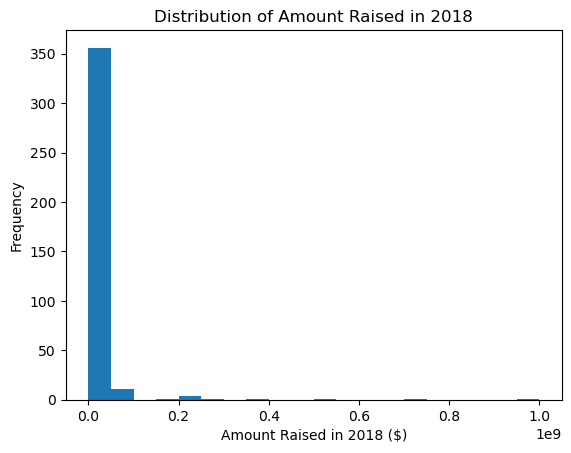

In [146]:
# Plotting A histogram to visualize the distribution of funding amouns

# Histogram
plt.hist(df_2018['Amount($)'], bins=20)
plt.xlabel('Amount Raised in 2018 ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Raised in 2018')
plt.show()

In [147]:
# Replace NaN values in 'Amount($)' column with median
# Calculate the median of 'Amount($)' column
median_amount = df_2018['Amount($)'].median()

# Replace NaN values with median
df_2018['Amount($)'].fillna(median_amount, inplace=True)

# The updated dataframe
df_2018.head(15)

,Company Name,Industry,Round/Series,Amount($),Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1300000.0,"Hyderabad, Andhra Pradesh, India"
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,"Bengaluru, Karnataka, India"
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,"Kalkaji, Delhi, India"
7,Hyperdata.IO,Market Research,Angel,730000.0,"Hyderabad, Andhra Pradesh, India"
8,Freightwalla,"Information Services, Information Technology",Seed,1300000.0,"Mumbai, Maharashtra, India"
9,Microchip Payments,Mobile Payments,Seed,1300000.0,"Bangalore, Karnataka, India"


#### c). Cleaning the 'Location' column

In [148]:
# Get unique Locations
df_2018['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [149]:
# Split the 'Location' column into City, State and Country columns
df_2018[["City", "State", "Country"]] = df_2018["Location"].str.split(", ", expand=True)

# Drop the Location column as it has been split into City, State and Country columns
df_2018.drop("Location", axis=1, inplace=True)

# Drop the State column as it is not needed for the analysis
df_2018.drop("State", axis=1, inplace=True)

# Drop the Country column as it is not needed for the analysis
df_2018.drop("Country", axis=1, inplace=True)

df_2018.head()

,Company Name,Industry,Round/Series,Amount($),City
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1300000.0,Hyderabad


In [22]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore' to maintain consistency in our dataset.
df_2018['Location'] = df_2018['Location'].str.replace('Bengaluru', 'Bangalore', case=False)
df_2018['Location'] = df_2018['Location'].str.replace('Bangalore city', 'Bangalore', case=False)

df_2018

,Company Name,Industry,Round/Series,Amount($),Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1300000.0,"Hyderabad, Andhra Pradesh, India"
...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.0,"Bangalore, Karnataka, India"
522,Happyeasygo Group,"Tourism, Travel",Series A,1300000.0,"Haryana, Haryana, India"
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,"Mumbai, Maharashtra, India"
524,Droni Tech,Information Technology,Seed,511000.0,"Mumbai, Maharashtra, India"


#### d). Cleaning the 'Round/Series' column, replacing variations in the representation of the same funding stages with a consistent one

In [150]:
# Get unique funding Round/Series
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [151]:
# Create a mapping dictionary that maps the variations to the standard representation
round_series_mapping = {'Pre-seed':['Pre-seed','Pre-Seed'],
                        'Equity': ['Private Equity', 'Post-IPO Equity'],
                        'Undisclosed': ['Undisclosed','Venture - Series Unknown','Funding Round', 
                        'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'],
                        'Debt': ['Debt Financing', 'Post-IPO Debt']}

# use a lambda function with the apply() function to map each funding stage based on the mapping dictionary.
df_2018['Round/Series'] = df_2018['Round/Series'].apply(lambda x: next((k for k, v in round_series_mapping.items() if x in v), x))

# Confirm if changes have been effected
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-seed', 'Equity',
       'Undisclosed', 'Grant', 'Debt', 'Series H', 'Series C', 'Series E',
       'Corporate Round', 'Series D', 'Secondary Market',
       'Non-equity Assistance'], dtype=object)

### iv. Checking for Missing values and Confirming The data types again

In [152]:
# Check for Missing values in 2018 Dataset again
missing_values = df_2018.isnull().sum()

# Number of missing values in each column
missing_values

Company Name    0
Industry        0
Round/Series    0
Amount($)       0
City            0
dtype: int64

In [153]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### v. Creating a new column 'Year' and setting it to 2018

In [154]:
# create a new column 'Year' and set it to 2020 to differentiate it from the other datasets
df_2018.insert(0,'Year', 2018)
df_2018.head()

,Year,Company Name,Industry,Round/Series,Amount($),City
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1300000.0,Hyderabad


## 2. The 2019 Dataset

In [155]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


# Cleaning The 2019 Dataset

In [156]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### i. Dropping the columns that are not needed for the analysis

In [157]:
# Drop the 'Founded' column
df_2019 = df_2019.drop('Founded', axis=1)

# Drop the 'What it does' column
df_2019 = df_2019.drop('What it does', axis=1)

# Drop the 'Founders' column
df_2019 = df_2019.drop('Founders', axis=1)

# Drop the 'Investor' column
df_2019 = df_2019.drop('Investor', axis=1)

df_2019.head()

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,NaN,Ecommerce,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",NaN


### ii. Checking for Duplicates in The Dataset

In [158]:
# Create a boolean mask that identifies duplicates
duplicates = df_2019.duplicated(keep=False)

# Count the number of occurrences of each unique value in the boolean mask
value_counts = duplicates.value_counts()

# The value counts
value_counts

False    89
dtype: int64

### iii. Checking for Missing Values in The Dataset

In [159]:
# check for Missing values in 2019 Dataset
missing_values = df_2019.isnull().sum()

# Number of missing values in each column
missing_values

Company/Brand     0
HeadQuarter      19
Sector            5
Amount($)         0
Stage            46
dtype: int64

#### a). Cleaning the 'Headquarter' column

In [160]:
df_2019['HeadQuarter'].describe

<bound method NDFrame.describe of 0           NaN
1        Mumbai
2        Mumbai
3       Chennai
4     Telangana
        ...    
84       Mumbai
85     Gurugram
86        Delhi
87        Delhi
88    Rajasthan
Name: HeadQuarter, Length: 89, dtype: object>

In [161]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
df_2019['HeadQuarter'] = df_2019['HeadQuarter'].fillna('Unavailable')
df_2019.head(15)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unavailable,Ecommerce,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",NaN
5,FlytBase,Pune,Technology,Undisclosed,NaN
6,Finly,Bangalore,SaaS,Undisclosed,NaN
7,Kratikal,Noida,Technology,"$1,000,000",Pre series A
8,Quantiphi,Unavailable,AI & Tech,"$20,000,000",Series A
9,Lenskart,Delhi,E-commerce,"$275,000,000",Series G


#### b). Cleaning the 'Sector' column

In [162]:
# Replace all missing values in the 'Sector' column with the string "Unknown".
df_2019['Sector'] = df_2019['Sector'].fillna('Unknown')
df_2019.head(50)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unavailable,Ecommerce,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",NaN
5,FlytBase,Pune,Technology,Undisclosed,NaN
6,Finly,Bangalore,SaaS,Undisclosed,NaN
7,Kratikal,Noida,Technology,"$1,000,000",Pre series A
8,Quantiphi,Unavailable,AI & Tech,"$20,000,000",Series A
9,Lenskart,Delhi,E-commerce,"$275,000,000",Series G


#### c). Cleaning the 'Stage' column

In [163]:
# Replace all missing values in the 'Stage' column with the string "Unknown".
df_2019['Stage'] = df_2019['Stage'].fillna('Undisclosed')
df_2019.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unavailable,Ecommerce,"$6,300,000",Undisclosed
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",Undisclosed
5,FlytBase,Pune,Technology,Undisclosed,Undisclosed
6,Finly,Bangalore,SaaS,Undisclosed,Undisclosed
7,Kratikal,Noida,Technology,"$1,000,000",Pre series A
8,Quantiphi,Unavailable,AI & Tech,"$20,000,000",Series A
9,Lenskart,Delhi,E-commerce,"$275,000,000",Series G


In [164]:
# Get unique funding stages
df_2019['Stage'].unique()

array(['Undisclosed', 'Series C', 'Fresh funding', 'Series D',
       'Pre series A', 'Series A', 'Series G', 'Series B',
       'Post series A', 'Seed funding', 'Seed fund', 'Series E',
       'Series F', 'Series B+', 'Seed round', 'Pre-series A'],
      dtype=object)

In [165]:
# Create a mapping dictionary that maps the variations to the standard representation
stage_mapping = {'Pre-series A': ['Pre series A'],
                 'Seed': ['Seed funding', 'Seed fund', 'Seed round'],
                 'Series A': ['Post series A'],
                 'Series B':['Series B+'],
                 'Undisclosed': ['Undisclosed','Fresh funding']}

# use a lambda function with the apply() function to map each funding stage based on the mapping dictionary.
df_2019['Stage'] = df_2019['Stage'].apply(lambda x: next((k for k, v in stage_mapping.items() if x in v), x))

# Confirm if changes have been effected
df_2019['Stage'].unique()

array(['Undisclosed', 'Series C', 'Series D', 'Pre-series A', 'Series A',
       'Series G', 'Series B', 'Seed', 'Series E', 'Series F'],
      dtype=object)

#### d). Cleaning the 'Amount' column, replacing any non-numeric values ("Undisclosed") with NaN, then converting the column to float datatype

In [166]:
# Replace currency symbol and commas with empty string
df_2019['Amount($)'] = df_2019['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Convert 'Amount' column to numeric datatype, replacing any non-numeric values with NaN using the 'coerce' option
df_2019['Amount($)'] = pd.to_numeric(df_2019['Amount($)'], errors='coerce')

# Convert Amount($) column from object to float datatype
df_2019['Amount($)'] = df_2019['Amount($)'].astype(float)

# The updated dataframe
df_2019.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unavailable,Ecommerce,6300000.0,Undisclosed
1,Ruangguru,Mumbai,Edtech,150000000.0,Series C
2,Eduisfun,Mumbai,Edtech,28000000.0,Undisclosed
3,HomeLane,Chennai,Interior design,30000000.0,Series D
4,Nu Genes,Telangana,AgriTech,6000000.0,Undisclosed
5,FlytBase,Pune,Technology,NaN,Undisclosed
6,Finly,Bangalore,SaaS,NaN,Undisclosed
7,Kratikal,Noida,Technology,1000000.0,Pre-series A
8,Quantiphi,Unavailable,AI & Tech,20000000.0,Series A
9,Lenskart,Delhi,E-commerce,275000000.0,Series G


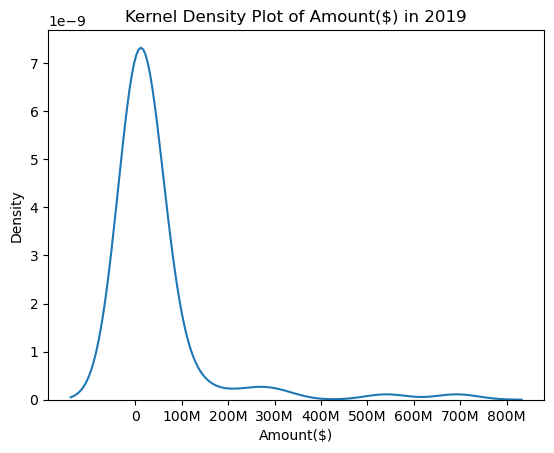

In [167]:
# Plotting a kernel density (KDE) plot to show the distribution of values in the 'Amount($)' column for the year 2019.

sns.kdeplot(df_2019['Amount($)'])
plt.title('Kernel Density Plot of Amount($) in 2019')
plt.xlabel('Amount($)')
plt.xticks([0, 1e8, 2e8, 3e8, 4e8, 5e8, 6e8, 7e8, 8e8], ['0', '100M', '200M', '300M', '400M', '500M', '600M', '700M', '800M'])
plt.show()

In [168]:
# Replace NaN values in 'Amount($)' column with the column's median value.
# Calculate the median of 'Amount($)' column
median_amount = df_2019['Amount($)'].median()

# Replace NaN values with median
df_2019['Amount($)'].fillna(median_amount, inplace=True)

# The updated dataframe
df_2019.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unavailable,Ecommerce,6300000.0,Undisclosed
1,Ruangguru,Mumbai,Edtech,150000000.0,Series C
2,Eduisfun,Mumbai,Edtech,28000000.0,Undisclosed
3,HomeLane,Chennai,Interior design,30000000.0,Series D
4,Nu Genes,Telangana,AgriTech,6000000.0,Undisclosed
5,FlytBase,Pune,Technology,6000000.0,Undisclosed
6,Finly,Bangalore,SaaS,6000000.0,Undisclosed
7,Kratikal,Noida,Technology,1000000.0,Pre-series A
8,Quantiphi,Unavailable,AI & Tech,20000000.0,Series A
9,Lenskart,Delhi,E-commerce,275000000.0,Series G


### iv. Checking for Missing values and Confirming The data types again

In [169]:
# Check for Missing values in 2019 Dataset again
missing_values = df_2019.isnull().sum()

# Number of missing values in each column
missing_values

Company/Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
dtype: int64

In [170]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   HeadQuarter    89 non-null     object 
 2   Sector         89 non-null     object 
 3   Amount($)      89 non-null     float64
 4   Stage          89 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.6+ KB


### v. Creating a new column 'Year' and setting it to 2019

In [171]:
# create a new column 'Year' and set it to 2019 to differentiate it from the other datasets
df_2019.insert(0,'Year', 2019) 
df_2019.head()

,Year,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,2019,Bombay Shaving,Unavailable,Ecommerce,6300000.0,Undisclosed
1,2019,Ruangguru,Mumbai,Edtech,150000000.0,Series C
2,2019,Eduisfun,Mumbai,Edtech,28000000.0,Undisclosed
3,2019,HomeLane,Chennai,Interior design,30000000.0,Series D
4,2019,Nu Genes,Telangana,AgriTech,6000000.0,Undisclosed


# 3. The 2020 Dataset

In [172]:
df_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [173]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


# Cleaning The 2020 Dataset

### i. Dropping the columns that are not needed for the analysis

In [174]:
# Drop the 'Founded' column
df_2020 = df_2020.drop('Founded', axis=1)

# Drop the 'What it does' column
df_2020 = df_2020.drop('What it does', axis=1)

# Drop the 'Founders' column
df_2020 = df_2020.drop('Founders', axis=1)

# Drop the 'Investor' column
df_2020 = df_2020.drop('Investor', axis=1)

# Drop the 'Unnamed: 9' column
df_2020 = df_2020.drop('Unnamed: 9', axis=1)

df_2020.head()

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,"$200,000",NaN
1,Krayonnz,Bangalore,EdTech,"$100,000",Pre-seed
2,PadCare Labs,Pune,Hygiene management,Undisclosed,Pre-seed
3,NCOME,New Delhi,Escrow,"$400,000",NaN
4,Gramophone,Indore,AgriTech,"$340,000",NaN


In [175]:
df_2019

,Year,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,2019,Bombay Shaving,Unavailable,Ecommerce,6300000.0,Undisclosed
1,2019,Ruangguru,Mumbai,Edtech,150000000.0,Series C
2,2019,Eduisfun,Mumbai,Edtech,28000000.0,Undisclosed
3,2019,HomeLane,Chennai,Interior design,30000000.0,Series D
4,2019,Nu Genes,Telangana,AgriTech,6000000.0,Undisclosed
...,...,...,...,...,...,...
84,2019,Infra.Market,Mumbai,Infratech,20000000.0,Series A
85,2019,Oyo,Gurugram,Hospitality,693000000.0,Undisclosed
86,2019,GoMechanic,Delhi,Automobile & Technology,5000000.0,Series B
87,2019,Spinny,Delhi,Automobile,50000000.0,Undisclosed


### ii. Checking for Duplicates in The Dataset

In [176]:
# Create a boolean mask that identifies duplicates
duplicates = df_2020.duplicated(keep=False)

# Count the number of occurrences of each unique value in the boolean mask
value_counts = duplicates.value_counts()

# The value counts
value_counts

False    1043
True       12
dtype: int64

In [177]:
# Identify duplicate rows based on all columns
duplicates = df_2020[df_2020.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
120,Nykaa,Mumbai,Cosmetics,Undisclosed,NaN
129,Krimanshi,Jodhpur,Biotechnology company,"$600,000",Seed
145,Krimanshi,Jodhpur,Biotechnology company,"$600,000",Seed
205,Nykaa,Mumbai,Cosmetics,Undisclosed,NaN
215,Genius Teacher,Mumbai,Edtech,"$2,000,000",NaN
233,Genius Teacher,Mumbai,Edtech,"$2,000,000",NaN
326,Byju’s,Bangalore,EdTech,"$500,000,000",NaN
362,Byju’s,Bangalore,EdTech,"$500,000,000",NaN
771,Capital Float,Bangalore,Fintech,"$15,000,000",NaN
935,Byju,NaN,Edtech,"$200,000,000",NaN


In [178]:
# Drop the duplicate rows
df_2020.drop_duplicates(keep='first', inplace=True)

In [179]:
# Confirm if duplicate rows have been dropped
duplicates = df_2020[df_2020.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount($),Stage


### iii. Checking for Missing Values in The Dataset

In [180]:
# check for Missing values in 2020 Dataset
missing_values = df_2020.isnull().sum()

# The number of missing values in each column
missing_values

Company/Brand      0
HeadQuarter       93
Sector            13
Amount($)          3
Stage            459
dtype: int64

#### a). Cleaning the 'Headquarter' column

In [181]:
df_2020['HeadQuarter'].describe

<bound method NDFrame.describe of 0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051          NaN
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1049, dtype: object>

In [182]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].fillna('Unavailable')
df_2020.tail(15)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
1040,BuildPan,Indore,SaaS,Undisclosed,Seed Round
1041,Shiksha,Unavailable,Edtech,"$181,000",NaN
1042,Super Surfaces,Hyderabad,Deisgning,"$500,000",Series A
1043,Quicko,Ahmedabad,Taxation,"$280,000",NaN
1044,Satin Creditcare,Gurgaon,Fintech,"$15,000,000",NaN
1045,XpressBees,Unavailable,Logistics,"$10,000,000",NaN
1046,FarmERP,Pune,Agritech,Undisclosed,Series A
1047,Wealth Bucket,Unavailable,Fintech,"$3,000,000",NaN
1048,GoMechanic,Delhi,Automobile Technology,"$14,700,000",Series B
1049,Fashor,Chennai,Fashion,"$1,000,000",Pre Series A


In [183]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore' to maintain consistency in our dataset.
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].str.replace('Bengaluru', 'Bangalore', case=False)
df_2020

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,"$200,000",NaN
1,Krayonnz,Bangalore,EdTech,"$100,000",Pre-seed
2,PadCare Labs,Pune,Hygiene management,Undisclosed,Pre-seed
3,NCOME,New Delhi,Escrow,"$400,000",NaN
4,Gramophone,Indore,AgriTech,"$340,000",NaN
...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,"$1,500,000",NaN
1051,EpiFi,Unavailable,Fintech,"$13,200,000",Seed Round
1052,Purplle,Mumbai,Cosmetics,"$8,000,000",NaN
1053,Shuttl,Delhi,Transport,"$8,043,000",Series C


#### b). Cleaning the 'Sector' column

In [184]:
df_2020[730:750].head(20)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
734,Remedo,Noida,Healthtech,Undisclosed,Pre series A
735,News Reach,Ahmedabad,Media,Undisclosed,NaN
736,RoomSoom,Noida,Housing,Undisclosed,NaN
737,Pedagogy,Unavailable,Edtech,"$400,000",NaN
738,Classplus,Delhi,Edtech,"$8,200,000",Series B
739,Medlife,Bangalore,Pharmaceutical,"$15,500,000",NaN
740,Qin1,Noida,Edtech,Undisclosed,NaN
741,MYSUN,Delhi,Tech,"$4,257,000",Pre series A
742,ShopX,Bangalore,Ecommerce,"$1,410,000",NaN
743,Sarva,Unavailable,Yoga & wellness,Undisclosed,NaN


In [185]:
# Replace all missing values in the 'Sector' column with the string "Unknown".
df_2020['Sector'] = df_2020['Sector'].fillna('Unknown')
df_2020[730:750].head(20)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
734,Remedo,Noida,Healthtech,Undisclosed,Pre series A
735,News Reach,Ahmedabad,Media,Undisclosed,NaN
736,RoomSoom,Noida,Housing,Undisclosed,NaN
737,Pedagogy,Unavailable,Edtech,"$400,000",NaN
738,Classplus,Delhi,Edtech,"$8,200,000",Series B
739,Medlife,Bangalore,Pharmaceutical,"$15,500,000",NaN
740,Qin1,Noida,Edtech,Undisclosed,NaN
741,MYSUN,Delhi,Tech,"$4,257,000",Pre series A
742,ShopX,Bangalore,Ecommerce,"$1,410,000",NaN
743,Sarva,Unavailable,Yoga & wellness,Undisclosed,NaN


#### c). Cleaning the 'Stage' column

In [186]:
df_2020.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,"$200,000",NaN
1,Krayonnz,Bangalore,EdTech,"$100,000",Pre-seed
2,PadCare Labs,Pune,Hygiene management,Undisclosed,Pre-seed
3,NCOME,New Delhi,Escrow,"$400,000",NaN
4,Gramophone,Indore,AgriTech,"$340,000",NaN
5,qZense,Bangalore,AgriTech,"$600,000",Seed
6,MyClassboard,Hyderabad,EdTech,"$600,000",Pre-series A
7,Metvy,Gurgaon,Networking platform,Undisclosed,Pre-series
8,Rupeek,Bangalore,FinTech,"$45,000,000",Series C
9,Gig India,Pune,Crowdsourcing,"$1,000,000",Pre-series A


In [187]:
# Replace all missing values in the 'Stage' column with the string "Unknown".
df_2020['Stage'] = df_2020['Stage'].fillna('Undisclosed')
df_2020.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,"$200,000",Undisclosed
1,Krayonnz,Bangalore,EdTech,"$100,000",Pre-seed
2,PadCare Labs,Pune,Hygiene management,Undisclosed,Pre-seed
3,NCOME,New Delhi,Escrow,"$400,000",Undisclosed
4,Gramophone,Indore,AgriTech,"$340,000",Undisclosed
5,qZense,Bangalore,AgriTech,"$600,000",Seed
6,MyClassboard,Hyderabad,EdTech,"$600,000",Pre-series A
7,Metvy,Gurgaon,Networking platform,Undisclosed,Pre-series
8,Rupeek,Bangalore,FinTech,"$45,000,000",Series C
9,Gig India,Pune,Crowdsourcing,"$1,000,000",Pre-series A


In [188]:
# Get unique funding stages
df_2020['Stage'].unique()

array(['Undisclosed', 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series',
       'Series C', 'Series A', 'Series B', 'Debt', 'Pre-series C',
       'Pre-series B', 'Series E', 'Bridge', 'Series D', 'Series B2',
       'Series F', 'Pre- series A', 'Edge', 'Series H', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [189]:
# Create a mapping dictionary that maps the variations to the standard representation
stage_mapping = {'Pre-seed':['Pre-seed','Pre-Seed','Pre seed Round','Pre seed round','Pre-seed Round'],
                 'Pre-series A': ['Pre-series A', 'Pre- series A', 'Pre-Series A', 
                                  'Pre series A1', 'Pre Series A','Pre-series','Pre series A'],
                 'Series A': ['Series A','Seed Round & Series A','Series A-1'],
                 'Series B': ['Series B','Pre-series B','Pre-Series B','Pre series B'],
                 'Series C': ['Series C','Pre-series C','Pre series C'],
                 'Series D': ['Series D','Series D1'],
                 'Series E': ['Series E','Series E2'],
                 'Angel': ['Angel','Angel Round'],
                 'Bridge': ['Bridge','Bridge Round'],
                 'Seed': ['Seed','Seed A','Seed funding','Seed Funding','Seed Investment','Seed round','Seed Round',],
                 'Undisclosed': ['Undisclosed','Edge','Mid series','Series C, D']}
                 

# use a lambda function with the apply() function to map each funding stage based on the mapping dictionary.
df_2020['Stage'] = df_2020['Stage'].apply(lambda x: next((k for k, v in stage_mapping.items() if x in v), x))

# Confirm if changes have been effected
df_2020['Stage'].unique()

array(['Undisclosed', 'Pre-seed', 'Seed', 'Pre-series A', 'Series C',
       'Series A', 'Series B', 'Debt', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Series H', 'Angel'], dtype=object)

#### d). Cleaning the 'Amount' column, replacing any non-numeric values ("Undisclosed") with NaN, then converting the column to float datatype

In [190]:
# Replace currency symbol and commas with empty string
df_2020['Amount($)'] = df_2020['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Convert 'Amount' column to numeric datatype, replacing any non-numeric values with NaN using the 'coerce' option
df_2020['Amount($)'] = pd.to_numeric(df_2020['Amount($)'], errors='coerce')

# Convert Amount($) column from object to float datatype
df_2020['Amount($)'] = df_2020['Amount($)'].astype(float)

# The updated dataframe
df_2020.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,200000.0,Undisclosed
1,Krayonnz,Bangalore,EdTech,100000.0,Pre-seed
2,PadCare Labs,Pune,Hygiene management,NaN,Pre-seed
3,NCOME,New Delhi,Escrow,400000.0,Undisclosed
4,Gramophone,Indore,AgriTech,340000.0,Undisclosed
5,qZense,Bangalore,AgriTech,600000.0,Seed
6,MyClassboard,Hyderabad,EdTech,600000.0,Pre-series A
7,Metvy,Gurgaon,Networking platform,NaN,Pre-series A
8,Rupeek,Bangalore,FinTech,45000000.0,Series C
9,Gig India,Pune,Crowdsourcing,1000000.0,Pre-series A


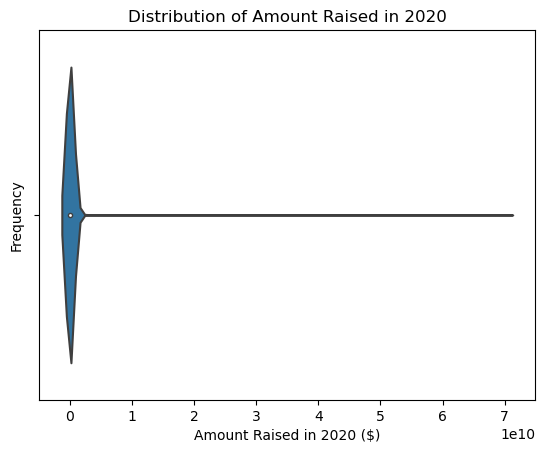

In [191]:
# Create a violin plot to show the distribution of the amount raised in 2020
sns.violinplot(x=df_2020['Amount($)'])
plt.title('Distribution of Amount Raised in 2020')
# Set the x-axis label
plt.xlabel('Amount Raised in 2020 ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [192]:
# Replace NaN values in 'Amount($)' column with the column's median value.
# Calculate the median of 'Amount($)' column
median_amount = df_2020['Amount($)'].median()

# Replace NaN values with median
df_2020['Amount($)'].fillna(median_amount, inplace=True)

# The updated dataframe
df_2020.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,200000.0,Undisclosed
1,Krayonnz,Bangalore,EdTech,100000.0,Pre-seed
2,PadCare Labs,Pune,Hygiene management,3000000.0,Pre-seed
3,NCOME,New Delhi,Escrow,400000.0,Undisclosed
4,Gramophone,Indore,AgriTech,340000.0,Undisclosed
5,qZense,Bangalore,AgriTech,600000.0,Seed
6,MyClassboard,Hyderabad,EdTech,600000.0,Pre-series A
7,Metvy,Gurgaon,Networking platform,3000000.0,Pre-series A
8,Rupeek,Bangalore,FinTech,45000000.0,Series C
9,Gig India,Pune,Crowdsourcing,1000000.0,Pre-series A


In [193]:
# Calculate z-score for the 'Amount($)' column in df_2020 
z_scores = (df_2020['Amount($)'] - df_2020['Amount($)'].mean()) / df_2020['Amount($)'].std()

# Set a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
outliers = df_2020[np.abs(z_scores) > 3]

# Display the outlier(s) and their corresponding information
outliers

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
280,Reliance Retail Ventures Ltd,Mumbai,Retail,7.000000e+10,Undisclosed


In [194]:
# Verify the funding amount for Alteria Capital and correct accordingly

In [195]:
# Update the funding amount for Reliance Retail Ventures Ltd
# Replace with the correct funding amount
correct_amount = 6400000000
df_2020.loc[df_2020['Company/Brand'] == 'Reliance Retail Ventures Ltd', 'Amount($)'] = correct_amount

In [196]:
# Find startups with "Reliance" in their names
reliance_startups = df_2020[df_2020['Company/Brand'].str.contains('Reliance')]
reliance_startups

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
165,Reliance Retail,Mumbai,E-commerce,1.000000e+07,Undisclosed
280,Reliance Retail Ventures Ltd,Mumbai,Retail,6.400000e+09,Undisclosed
302,Reliance Retail Ventures,Mumbai,E-commerce,8.000000e+08,Undisclosed
328,Reliance,Mumbai,Multinational conglomerate company,2.200000e+09,Undisclosed
364,Reliance Retail,Mumbai,E-commerce,1.022000e+07,Undisclosed


In [197]:
# Drop all other Reliance instances since the Reliance Retail Ventures Ltd instance caters for all the funding raised by the company in 2020
index_to_drop = [165, 302, 328, 364]
df_2020 = df_2020.drop(index=index_to_drop)

### iv. Checking for Missing values and Confirming The data typtes again

In [198]:
# check for Missing values in 2020 Dataset again
missing_values = df_2020.isnull().sum()

# Number of missing values in each column
missing_values

Company/Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
dtype: int64

In [199]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1054
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1045 non-null   object 
 1   HeadQuarter    1045 non-null   object 
 2   Sector         1045 non-null   object 
 3   Amount($)      1045 non-null   float64
 4   Stage          1045 non-null   object 
dtypes: float64(1), object(4)
memory usage: 49.0+ KB


### v. Creating a new column 'Year' and setting it to 2020

In [200]:
# create a new column 'Year' and set it to 2020 to differentiate it from the other datasets
df_2020.insert(0,'Year', 2020)
df_2020.head()

,Year,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,2020,Aqgromalin,Chennai,AgriTech,200000.0,Undisclosed
1,2020,Krayonnz,Bangalore,EdTech,100000.0,Pre-seed
2,2020,PadCare Labs,Pune,Hygiene management,3000000.0,Pre-seed
3,2020,NCOME,New Delhi,Escrow,400000.0,Undisclosed
4,2020,Gramophone,Indore,AgriTech,340000.0,Undisclosed


# 4. The 2021 Dataset

In [201]:
df_2021.loc[254:257].head(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
254,Evenflow Brands,2020.0,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",NaN,$500000,NaN
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN


In [202]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


# Cleaning The 2021 Dataset

### i. Dropping the columns that are not needed for the analysis

In [203]:
# Drop the 'Founded' column
df_2021 = df_2021.drop('Founded', axis=1)

# Drop the 'What it does' column
df_2021 = df_2021.drop('What it does', axis=1)

# Drop the 'Founders' column
df_2021 = df_2021.drop('Founders', axis=1)

# Drop the 'Investor' column
df_2021 = df_2021.drop('Investor', axis=1)

df_2021.head()

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Unbox Robotics,Bangalore,AI startup,"$1,200,000",Pre-series A
1,upGrad,Mumbai,EdTech,"$120,000,000",NaN
2,Lead School,Mumbai,EdTech,"$30,000,000",Series D
3,Bizongo,Mumbai,B2B E-commerce,"$51,000,000",Series C
4,FypMoney,Gurugram,FinTech,"$2,000,000",Seed


### ii. Checking for Duplicates in The Dataset

In [204]:
# Create a boolean mask that identifies duplicates
duplicates = df_2021.duplicated(keep=False)

# Count the number of occurrences of each unique value in the boolean mask
value_counts = duplicates.value_counts()

# The value counts
value_counts

False    1165
True       44
dtype: int64

In [205]:
# Identify duplicate rows based on all columns
duplicates = df_2021[df_2021.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
94,Curefoods,Bangalore,Food & Beverages,$13000000,NaN
96,Bewakoof,Mumbai,Apparel & Fashion,$8000000,NaN
98,FanPlay,Computer Games,Computer Games,Upsparks,$1200000
104,Advantage Club,Mumbai,HRTech,$1700000,NaN
106,Ruptok,New Delhi,FinTech,$1000000,NaN
107,Curefoods,Bangalore,Food & Beverages,$13000000,NaN
109,Bewakoof,Mumbai,Apparel & Fashion,$8000000,NaN
111,FanPlay,Computer Games,Computer Games,Upsparks,$1200000
117,Advantage Club,Mumbai,HRTech,$1700000,NaN
119,Ruptok,New Delhi,FinTech,$1000000,NaN


In [206]:
# Drop one of the duplicate rows
df_2021.drop_duplicates(keep='first', inplace=True)

In [207]:
# Confirm if duplicate rows have been dropped
duplicates = df_2021[df_2021.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount($),Stage


### iii. Checking for Missing Values in The Dataset

In [208]:
# check for Missing values in 2021 Dataset
missing_values = df_2021.isnull().sum()

# The number of missing values in each column
missing_values

Company/Brand      0
HeadQuarter        1
Sector             0
Amount($)          3
Stage            420
dtype: int64

#### a). Cleaning the 'Headquarter' column

In [209]:
df_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technolo

In [210]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].fillna('Unavailable')
df_2021.iloc[28:35].head(7)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
28,TrulyMadly,New Delhi,Dating,"$2,000,000",Pre-series A
29,Vidyakul,Unavailable,EdTech,"$500,000",Seed
30,Jambox Games,Bangalore,Gaming,"$1,100,000",Seed
31,Miko,Mumbai,Robotics,"$6,000,000",NaN
32,SuperK,"Small Towns, Andhra Pradesh",Retail,"$800,000",Seed
33,TagZ Foods,Bangalore,Food,"$500,000",Pre-series A
34,Fuel Buddy,New Delhi,Oil and Energy,"$1,000,000",NaN


In [211]:
# Handling the rows with the "\t#REF!" error

# filter based on the desired string
df_filtered = df_2021[df_2021['HeadQuarter'].str.contains('\t#REF!')]

# display the filtered dataframe
df_filtered

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
242,Fullife Healthcare,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Series C,NaN
257,MoEVing,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,Seed,NaN
1100,Sochcast,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,NaN,NaN


In [212]:
# Drop the rows with the "\t#REF!" error since almosy all columns contain wrong values
df_2021 = df_2021.drop(df_2021[df_2021['HeadQuarter'].str.contains('\t#REF!')].index)

#### b). Cleaning the 'Stage' column

##### Handling Missing Values

In [213]:
# Replace all missing values in the 'Stage' column with the string "Unknown".
df_2021['Stage'] = df_2021['Stage'].fillna('Undisclosed')
df_2021.iloc[90:100].head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
90,Studio Sirah,Bangalore,Computer Games,$800000,Undisclosed
91,OTO Capital,Mumbai,FinTech,$6000000,Undisclosed
92,1Bridge,Bangalore,Consumer Goods,$2500000,Undisclosed
93,Skeps,Gurugram,FinTech,$9500000,Undisclosed
94,Curefoods,Bangalore,Food & Beverages,$13000000,Undisclosed
95,TartanSense,Bangalore,Information Technology,$5000000,Undisclosed
96,Bewakoof,Mumbai,Apparel & Fashion,$8000000,Undisclosed
97,Kirana247,New Delhi,Logistics & Supply Chain,$1000000,Undisclosed
98,FanPlay,Computer Games,Computer Games,Upsparks,$1200000
99,NeoDocs,Mumbai,Healthtech,$Undisclosed,Undisclosed


In [214]:
# Get unique funding stages
df_2021['Stage'].unique()

array(['Pre-series A', 'Undisclosed', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Pre-series B',
       'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [215]:
# Create a mapping dictionary that maps the variations to the standard representation
stage_mapping = {'Pre-series A': ['Pre-series A', 'Pre-series A1','Early seed'],
                 'Seed':['Seed','Seed+','PE'],
                 'Series A': ['Series A','Series A+','Pre-series','Series A2','Seies A'],
                 'Series B': ['Series B','Pre-series B','Series B3'],
                 'Series C': ['Series C','Pre-series C','Pre series C'],
                 'Series D': ['Series D','Series D1'],
                 'Series F': ['Series F','Series F1','Series F2'],
                 'Angel': ['Angel','Angel Round'],
                 'Undisclosed': ['Undisclosed','Unknown']}
                 

# use a lambda function with the apply() function to map each funding stage based on the mapping dictionary.
df_2021['Stage'] = df_2021['Stage'].apply(lambda x: next((k for k, v in stage_mapping.items() if x in v), x))

# Confirm if changes have been effected
df_2021['Stage'].unique()

array(['Pre-series A', 'Undisclosed', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Debt', '$1200000',
       'Bridge', 'Series F', 'Series G', 'Series H', '$300000',
       '$6000000', '$1000000', 'Series I'], dtype=object)

##### Handling incorrect values in the 'Amount($)', 'Stage' and 'HeadQuarter' columns

In [216]:
# Use str.contains() to find rows in the stage column that contain a dollar sign followed by a numerical value
dollar_amounts = df_2021[df_2021['Stage'].str.contains('\$\d+')]

# The resulting rows
dollar_amounts

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
98,FanPlay,Computer Games,Computer Games,Upsparks,$1200000
538,Little Leap,New Delhi,EdTech,ah! Ventures,$300000
551,BHyve,Mumbai,Human Resources,"ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,Mumbai,Commercial Real Estate,NaN,$6000000
677,Saarthi Pedagogy,Ahmadabad,EdTech,"JITO Angel Network, LetsVenture",$1000000


In [217]:
# Define a list of indices to modify
indices_to_modify = [98, 538, 551, 674, 677]

# Loop through the rows in the 'dollar_amounts' dataframe and replace the dollar amounts in the 'Stage' column with the values in the 'Amount($)' column for the specified indices
for index, row in dollar_amounts.iterrows():
    if index in indices_to_modify:
        amount = row['Stage']
        if pd.notnull(amount):
            df_2021.loc[index, 'Amount($)'] = str(amount)

# Loop through the rows in the 'df_2021' dataframe and replace the values in the 'Stage' column with NaN for the specified indices
for index in indices_to_modify:
    df_2021.loc[index, 'Stage'] = np.nan

# Display the modified dataframe
df_2021.loc[[98, 538, 551, 674, 677]]

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
98,FanPlay,Computer Games,Computer Games,$1200000,NaN
538,Little Leap,New Delhi,EdTech,$300000,NaN
551,BHyve,Mumbai,Human Resources,$300000,NaN
674,MYRE Capital,Mumbai,Commercial Real Estate,$6000000,NaN
677,Saarthi Pedagogy,Ahmadabad,EdTech,$1000000,NaN


In [218]:
# Set the value at row 98 and column 'HeadQuarter' to NaN
df_2021.at[98, 'HeadQuarter'] = np.nan

# Display the modified dataframe
df_2021.loc[[98, 538, 551, 674, 677]]

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
98,FanPlay,NaN,Computer Games,$1200000,NaN
538,Little Leap,New Delhi,EdTech,$300000,NaN
551,BHyve,Mumbai,Human Resources,$300000,NaN
674,MYRE Capital,Mumbai,Commercial Real Estate,$6000000,NaN
677,Saarthi Pedagogy,Ahmadabad,EdTech,$1000000,NaN


In [219]:
# Handle the resultant missing values in the 'HeadQuarter' and 'Stage' columns
# Replace the missing value in index 98 of the 'HeadQuarter' column with the string "Unavailable".
df_2021.at[98, 'HeadQuarter'] = "Unavailable"

# Replace the missing values in indices 98, 538, 551, 674, and 677 of the 'Stage' column with the string "Unknown".
df_2021.loc[[98, 538, 551, 674, 677], 'Stage'] = "Unknown"

# Display the modified dataframe
df_2021.loc[[98, 538, 551, 674, 677]]

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
98,FanPlay,Unavailable,Computer Games,$1200000,Unknown
538,Little Leap,New Delhi,EdTech,$300000,Unknown
551,BHyve,Mumbai,Human Resources,$300000,Unknown
674,MYRE Capital,Mumbai,Commercial Real Estate,$6000000,Unknown
677,Saarthi Pedagogy,Ahmadabad,EdTech,$1000000,Unknown


### c). Cleaning the 'Amount' column, replacing any non-numeric values ("Undisclosed" and "$Undisclosed") with NaN, then converting the column to float datatype

In [220]:
df_2021.loc[300:330].head(30)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
300,Karkinos Healthcare,Mumbai,Hospital & Health Care,$Undisclosed,Undisclosed
301,OWO Technologies,Gurugram,Food & Beverages,$3000000,Seed
302,EsportsXO,Bangalore,Mobile Games,$1100000,Seed
303,The Gourmet Jar,Noida,Food & Beverages,$150000,Undisclosed
304,Zorgers,Mohali,Hospital & Health Care,$Undisclosed,Undisclosed
305,BangDB,Bangalore,Computer Software,$Undisclosed,Undisclosed
306,Neobank Jupiter,Mumbai,Banking,$86000000,Series C
307,Skippi Ice Pops,Hyderabad,Food Production,$130000,Undisclosed
308,Glii,Noida,Dating,"$$100,00",Seed
309,GlobalBees,New Delhi,E-commerce,$111000000,Series B


In [221]:
# Replace currency symbol($) and commas with empty string
df_2021['Amount($)'] = df_2021['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Convert to numeric datatype using the pd.to_numeric() function, with the 'coerce' option to convert non-numeric values to NaN.
df_2021['Amount($)'] = pd.to_numeric(df_2021['Amount($)'], errors='coerce')

# The updated dataframe
df_2021.loc[300:330].head(30)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
300,Karkinos Healthcare,Mumbai,Hospital & Health Care,NaN,Undisclosed
301,OWO Technologies,Gurugram,Food & Beverages,3000000.0,Seed
302,EsportsXO,Bangalore,Mobile Games,1100000.0,Seed
303,The Gourmet Jar,Noida,Food & Beverages,150000.0,Undisclosed
304,Zorgers,Mohali,Hospital & Health Care,NaN,Undisclosed
305,BangDB,Bangalore,Computer Software,NaN,Undisclosed
306,Neobank Jupiter,Mumbai,Banking,86000000.0,Series C
307,Skippi Ice Pops,Hyderabad,Food Production,130000.0,Undisclosed
308,Glii,Noida,Dating,10000.0,Seed
309,GlobalBees,New Delhi,E-commerce,111000000.0,Series B


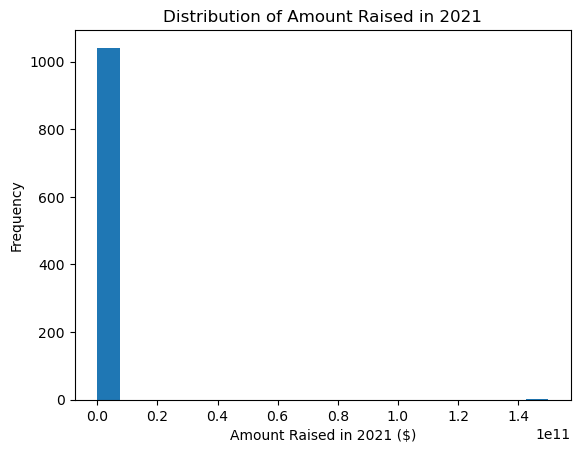

In [222]:
# Plotting A histogram to visualize the distribution of funding amouns

# Histogram
plt.hist(df_2021['Amount($)'], bins=20)
plt.xlabel('Amount Raised in 2021 ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Raised in 2021')
plt.show()

In [223]:
# Replace NaN values in 'Amount($)' column with median
# Calculate the median of 'Amount($)' column
median_amount = df_2021['Amount($)'].median()

# Replace NaN values with median
df_2021['Amount($)'].fillna(median_amount, inplace=True)

# The updated dataframe
df_2021.loc[300:330].head(30)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
300,Karkinos Healthcare,Mumbai,Hospital & Health Care,3500000.0,Undisclosed
301,OWO Technologies,Gurugram,Food & Beverages,3000000.0,Seed
302,EsportsXO,Bangalore,Mobile Games,1100000.0,Seed
303,The Gourmet Jar,Noida,Food & Beverages,150000.0,Undisclosed
304,Zorgers,Mohali,Hospital & Health Care,3500000.0,Undisclosed
305,BangDB,Bangalore,Computer Software,3500000.0,Undisclosed
306,Neobank Jupiter,Mumbai,Banking,86000000.0,Series C
307,Skippi Ice Pops,Hyderabad,Food Production,130000.0,Undisclosed
308,Glii,Noida,Dating,10000.0,Seed
309,GlobalBees,New Delhi,E-commerce,111000000.0,Series B


In [224]:
# Calculate z-score for the 'Amount($)' column in df_2021 
z_scores = (df_2021['Amount($)'] - df_2021['Amount($)'].mean()) / df_2021['Amount($)'].std()

# Set a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
outliers = df_2021[np.abs(z_scores) > 3]

# Display the outlier(s) and their corresponding information
outliers

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
73,Alteria Capital,Mumbai,FinTech,1.500000e+11,Debt


In [225]:
# Verify the funding amount for Alteria Capital and correct accordingly

According to Crunchbase Alteria Capital raised ₹13.3B in 2021. This is equivalent to around $160510637.70
Source: https://www.crunchbase.com/organization/alteria-capital/investor_financials

In [ ]:
# Update the funding amount for Alteria Capital
# Replace with the correct funding amount
correct_amount = 160510637.70  
df_2021.loc[df_2021['Company/Brand'] == 'Alteria Capital', 'Amount($)'] = correct_amount

### iv. Checking for Missing values and Confirming The data typtes again

In [ ]:
# check for Missing values in 2020 Dataset again
missing_values = df_2021.isnull().sum()

# Number of missing values in each column
missing_values

In [ ]:
df_2021.info()

### v. Creating a new column 'Year' and setting it to 2021

In [ ]:
# create a new column 'Year' and set it to 2021 to differentiate it from the other datasets
df_2021.insert(0,'Year', 2021)
df_2021.head()

# 5. Formatting The Datasets and Merging Them Into One File

### i. Formatting The Columns of All Datasets To Ensure Consistency During Merging

In [ ]:
# All the datasets have same number of columns but 1 has different column titles/labels from others

# Display the columns for each dataset
print("Columns of 2018 dataset:")
print(df_2018.columns)

print("Columns of 2019 dataset:")
print(df_2019.columns)

print("Columns of 2020 dataset:")
print(df_2020.columns)

print("Columns of 2021 dataset:")
print(df_2021.columns)

In [ ]:
# Define a dictionary with the new column names
new_columns = {'Company Name': 'Company/Brand',
               'Industry': 'Sector',
               'Round/Series': 'Stage',
               'Amount($)': 'Amount($)',
               'City': 'HeadQuarter'}
    
# Rename the columns and rearrange them
df_2018 = df_2018.rename(columns=new_columns)
df_2018 = df_2018.reindex(columns=df_2019.columns)
df_2018.head()

### ii. Merging the datasets

In [ ]:
# Merge datasets using concat function
merged_df = pd.concat([df_2018, df_2019, df_2020, df_2021], axis=0, ignore_index=True)

# Check if the merging has been effected.
merged_df.head(20)

### iii. Check the integrity of Merged Data

In [ ]:
merged_df.info()

In [ ]:
# Check for NaN / Missing values
merged_df.isnull().sum()

In [ ]:
# Check for duplicates
merged_df.duplicated().sum()

In [ ]:
# Display the duplicate rows
duplicates = merged_df[merged_df.duplicated(keep=False)]
duplicates

In [ ]:
# Drop one of the duplicate rows
merged_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Confirm if duplicate rows have been dropped
duplicates = merged_df[merged_df.duplicated(keep=False)]
duplicates

In [ ]:
# Check for consistency
expected_rows = len(df_2018) + len(df_2019) + len(df_2020) + len(df_2021)
expected_cols = len(df_2019.columns)
if merged_df.shape == (expected_rows, expected_cols):
    print("The merged data has the expected number of rows and columns.")
else:
    print("The merged data does not have the expected number of rows and columns.")

### iv. Save the merged dataset to a new csv file

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

## Univariate Analysis

In [ ]:
# Load the merged dataframe
merged_df

### Univariate analysis for the 'Year' column

In [ ]:
# Univariate analysis for the 'Year' column
year_data = merged_df['Year']
year_data.describe()  # Summary statistics
year_data.value_counts()  # Frequency counts
year_data.hist()  # Histogram

### Univariate analysis for the 'Amount($)' column

In [ ]:
# Distribution of funding amounts using a boxplot
sns.boxplot(x=merged_df['Amount($)'])
plt.xlabel('Amount($)')
plt.title('Distribution of Funding Amounts')
plt.show()

## Multivariate Analysis

### Pairwise correlation matrix of numerical columns (year and Amount)

In [ ]:
# Pairwise correlation matrix
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing

## Restatement of Hypothesis

Null hypothesis: There is no significant relationship between a startup's sector and amount of funding secured.

Alternative hypothesis: There is a significant relationship between a startup's sector and amount of funding secured.

## ANOVA Test

In [ ]:
# Divide the dataset into groups based on the startup's sector
grouped_data = merged_df.groupby('Sector')['Amount($)'].apply(list)

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between sector and funding.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between sector and funding.")

# Answering the Questions

### 1. What is the Trend in startup funding in India over the years?

In [ ]:
# Plotting a line graph to show the startup funding trends in India across the years (2018-2021)
# Filter the merged_df to include only the desired years
desired_years = [2018, 2019, 2020, 2021]
filtered_df = merged_df[merged_df['Year'].isin(desired_years)]

# Group the filtered data by year and calculate the total funding amount for each year
funding_by_year = filtered_df.groupby('Year')['Amount($)'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker='o', color='purple')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in billions)')
plt.title('Trend in Startup Funding in India')

# Set the x-axis ticks to only display the desired years
plt.xticks(funding_by_year.index)

# Display the plot
plt.show()

### 2. What are the most common funding stage among Indian startups?

In [ ]:
# A value counts of the 'Stage' column and using the .head(10) function to sort the top 10 stages in descending order.
top_10_stages = merged_df['Stage'].value_counts().head(10)

# Plot a bar chart of the number of Top 10 Most Popular Stages of Funding among Startups in India
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stages.index, y=top_10_stages.values, palette='viridis')
plt.xlabel('Stage of Funding')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Popular Stages of Funding among Startups in India')
plt.show()

### 3. What Is The Average Funding Amount for Seed-stage Investments?

In [ ]:
# Filter the merged_df to include only seed-stage startups
seed_df = merged_df[merged_df['Stage'] == 'Seed']

# Group the data by year and calculate the mean funding amount for seed-stage startups
seed_df = seed_df.groupby('Year')['Amount($)'].mean().round()

# Create a new DataFrame with 'Year' and 'Amount' columns
seed_df = pd.DataFrame({'Year': seed_df.index, 'Amount': seed_df.values})
seed_df

In [ ]:
# Plotting the funding years and average funding amount for seed-stage startups
plt.figure(figsize=(10, 6))
sns.lineplot(data=seed_df, x='Year', y='Amount', marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Funding Amount ($)')
plt.title('Average Funding Amount for Seed-Stage Startups over the Years')
plt.xticks([2018, 2019, 2020, 2021])
plt.show()

### 4. Which sector has the highest average funding amount?

In [ ]:
# Plotting a horizontal bar graph showing the total funding amount for the top 10 sectors/industries in the Indian startup ecosystem.

# Calculate the total funding amount per sector by grouping the data based on the 'Sector' column and then summing the 'Amount($)' column. 
# .head(10) sorts the sectors in descending order and displays the top 10 sectors with the highest funding amount.
top_10_sectors = merged_df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='viridis')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector/Industry')
plt.title('Top 10 Sectors/Industries with Highest Funding Amount in the Indian Startup Ecosystem')
plt.show()

### 5: Which start-up headquarter locations received the highest amount of funding?

In [ ]:
# Group the data by headquarters location and calculate the total funding amount
location_funding = merged_df.groupby('HeadQuarter')['Amount($)'].sum()

# Sort the locations by funding amount in descending order
top_10_locations = location_funding.nlargest(10)

# Plot the total funding amount for the top 10 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='viridis')
plt.xlabel('Total Funding Amount')
plt.ylabel('Headquarters Location')
plt.title('Top 10 Locations with the Highest Total Funding Amount')

plt.show()

### 6. Which headquarter location has the highest number of startups?

In [ ]:
# Do a count of the values for each headquarter in the merged_df
top_10_cities = merged_df['HeadQuarter'].value_counts().head()
top_10_cities

In [ ]:
# Plotting a treemap showing the top 5 cities with the highest number of startups in the Indian startup ecosystem.
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_cities)))
squarify.plot(sizes=top_10_cities.values, label=[f'{c} ({v})' for c, v in zip(top_10_cities.index, top_10_cities.values)], color=colors, text_kwargs={'color': 'white'})
plt.axis('off')
plt.title('Top 10 Cities with the Highest Number of Startups (Treemap)')
plt.show()

## Recommendations

#### 1. Venture into the Indian startup ecosystem: 

From the analysis of startup funding trends, the Indian startup ecosystem has shown resilience and consistent growth in recent years. The increasing funding amounts indicate investor confidence and a thriving entrepreneurial landscape. Therefore, venturing into the Indian startup ecosystem could be a promising course of action for the team.

#### 2. Focus on sectors with high funding potential:

#### 3. Target seed-stage funding opportunities.

#### 4. Consider establishing headquarters or a significant presence in key startup hubs.

#### 5. Monitor and adapt to funding trends.


#### 6. Conduct further research and due diligence.